### Catboost

CatBoost has the flexibility of giving indices of categorical columns so that it can be encoded as one-hot encoding using one_hot_max_size. 
Use one-hot encoding for all features with number of different values less than or equal to the given parameter value.
If variable has more categorical level, then algo will encode them into a fashion not too different than mean encoding (likelihood encoding, target encoding: transform label into a number based on association with target variable).
If you don’t pass any anything in cat_features argument, CatBoost will treat all the columns as numerical variables.

For classification: encoding based on probabilitiy of target variable.
For regression: encoding based on mean of target variable.

Simple and smart feature engineering trick, but it has side effect of overfitting because taking information from target variable. 

Note: If a column having string values is not provided in the cat_features, CatBoost throws an error. Also, a column having default int type will be treated as numeric by default, one has to specify it in cat_features to make the algorithm treat it as categorical.

Hyperparameters:

<img src="boosting_algo.png">

Links:

https://tech.yandex.com/catboost/doc/dg/concepts/python-quickstart-docpage/

https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db

Python Data Science Essentials Alberto Boschetti, Luca Massaron

### CatBoostClassifier

data: 

https://www.kaggle.com/usdot/flight-delays/data

In [34]:
import pandas as pd, numpy as np, time
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Dataset : https://www.kaggle.com/usdot/flight-delays/data

data = pd.read_csv("C:/work/python/data/flights.csv")
data = data.sample(frac = 0.1, random_state=10)

data = data[["MONTH","DAY","DAY_OF_WEEK","AIRLINE","FLIGHT_NUMBER","DESTINATION_AIRPORT",
                 "ORIGIN_AIRPORT","AIR_TIME", "DEPARTURE_TIME","DISTANCE","ARRIVAL_DELAY"]]
data.dropna(inplace=True)

data["ARRIVAL_DELAY"] = (data["ARRIVAL_DELAY"]>10)*1

cols = ["AIRLINE","FLIGHT_NUMBER","DESTINATION_AIRPORT","ORIGIN_AIRPORT"]
for item in cols:
    data[item] = data[item].astype("category").cat.codes +1
 
train, test, y_train, y_test = train_test_split(data.drop(["ARRIVAL_DELAY"], axis=1), data["ARRIVAL_DELAY"],
                                                random_state=10, test_size=0.25)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
y_train.head(5)

5667282    1
5394234    0
2085192    0
2569202    0
4806942    0
Name: ARRIVAL_DELAY, dtype: int32

In [11]:
train.head(5)

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,DESTINATION_AIRPORT,ORIGIN_AIRPORT,AIR_TIME,DEPARTURE_TIME,DISTANCE
5667282,12,22,2,9,813,741,762,113.0,554.0,678
5394234,12,4,5,14,456,802,802,64.0,1136.0,372
2085192,5,13,3,5,4926,772,563,79.0,911.0,474
2569202,6,11,4,4,1270,678,544,43.0,2050.0,270
4806942,10,27,2,4,2278,145,19,61.0,1609.0,432


In [3]:
import catboost as cb
from sklearn.model_selection import RandomizedSearchCV #GridSearchCV : replace for manual search
cat_features_index = [0,1,2,3,4,5,6]

def auc(m, train, test): 
    return (metrics.roc_auc_score(y_train,m.predict_proba(train)[:,1]),
                            metrics.roc_auc_score(y_test,m.predict_proba(test)[:,1]))

#Parameter: 
#one_hot_max_size: threshold over to target encode any categorical variable  
#random_strength and bagging_temperature: to control randomized bagging

params = {'depth': [4, 7, 10], #depth of tree up to 16
          'learning_rate' : [0.03, 0.1, 0.15], # learning rate
         'l2_leaf_reg': [1,4,9], #regularization coefficent
         'iterations': [300]} #no. of iteration
cb = cb.CatBoostClassifier()
cb_model = RandomizedSearchCV(cb, params, scoring="roc_auc", cv = 3, refit=True) #with refit=True (which is the default), then once it finds the best estimator using cross-validation
retrains it on the whole training set. 
cb_model.fit(train, y_train)

0:	learn: 0.6810234	total: 168ms	remaining: 50.2s
1:	learn: 0.6696320	total: 253ms	remaining: 37.8s
2:	learn: 0.6589901	total: 327ms	remaining: 32.4s
3:	learn: 0.6491676	total: 407ms	remaining: 30.1s
4:	learn: 0.6398014	total: 476ms	remaining: 28.1s
5:	learn: 0.6311401	total: 545ms	remaining: 26.7s
6:	learn: 0.6229220	total: 622ms	remaining: 26s
7:	learn: 0.6152729	total: 693ms	remaining: 25.3s
8:	learn: 0.6080837	total: 766ms	remaining: 24.8s
9:	learn: 0.6015352	total: 848ms	remaining: 24.6s
10:	learn: 0.5952358	total: 917ms	remaining: 24.1s
11:	learn: 0.5893863	total: 987ms	remaining: 23.7s
12:	learn: 0.5840590	total: 1.06s	remaining: 23.4s
13:	learn: 0.5790141	total: 1.13s	remaining: 23.1s
14:	learn: 0.5741664	total: 1.21s	remaining: 22.9s
15:	learn: 0.5696885	total: 1.29s	remaining: 22.9s
16:	learn: 0.5654869	total: 1.36s	remaining: 22.7s
17:	learn: 0.5615303	total: 1.43s	remaining: 22.4s
18:	learn: 0.5578076	total: 1.52s	remaining: 22.5s
19:	learn: 0.5542934	total: 1.61s	remaining

161:	learn: 0.4904338	total: 12.9s	remaining: 11s
162:	learn: 0.4903348	total: 13s	remaining: 10.9s
163:	learn: 0.4902794	total: 13.1s	remaining: 10.8s
164:	learn: 0.4901729	total: 13.1s	remaining: 10.7s
165:	learn: 0.4901236	total: 13.2s	remaining: 10.7s
166:	learn: 0.4900220	total: 13.3s	remaining: 10.6s
167:	learn: 0.4899723	total: 13.3s	remaining: 10.5s
168:	learn: 0.4899143	total: 13.4s	remaining: 10.4s
169:	learn: 0.4898500	total: 13.5s	remaining: 10.3s
170:	learn: 0.4897961	total: 13.6s	remaining: 10.2s
171:	learn: 0.4896980	total: 13.6s	remaining: 10.1s
172:	learn: 0.4896421	total: 13.7s	remaining: 10s
173:	learn: 0.4895358	total: 13.8s	remaining: 9.96s
174:	learn: 0.4894771	total: 13.8s	remaining: 9.88s
175:	learn: 0.4894330	total: 13.9s	remaining: 9.79s
176:	learn: 0.4893413	total: 14s	remaining: 9.71s
177:	learn: 0.4892958	total: 14s	remaining: 9.62s
178:	learn: 0.4891990	total: 14.1s	remaining: 9.53s
179:	learn: 0.4891651	total: 14.2s	remaining: 9.45s
180:	learn: 0.4891236	

21:	learn: 0.5472040	total: 1.67s	remaining: 21.1s
22:	learn: 0.5443529	total: 1.75s	remaining: 21s
23:	learn: 0.5417340	total: 1.83s	remaining: 21s
24:	learn: 0.5391439	total: 1.92s	remaining: 21.1s
25:	learn: 0.5367757	total: 1.99s	remaining: 21s
26:	learn: 0.5345252	total: 2.07s	remaining: 20.9s
27:	learn: 0.5323587	total: 2.15s	remaining: 20.8s
28:	learn: 0.5303240	total: 2.22s	remaining: 20.7s
29:	learn: 0.5285147	total: 2.29s	remaining: 20.6s
30:	learn: 0.5268097	total: 2.36s	remaining: 20.5s
31:	learn: 0.5251456	total: 2.44s	remaining: 20.4s
32:	learn: 0.5235406	total: 2.51s	remaining: 20.3s
33:	learn: 0.5220466	total: 2.58s	remaining: 20.2s
34:	learn: 0.5206556	total: 2.65s	remaining: 20.1s
35:	learn: 0.5193223	total: 2.72s	remaining: 20s
36:	learn: 0.5180929	total: 2.8s	remaining: 19.9s
37:	learn: 0.5168976	total: 2.87s	remaining: 19.8s
38:	learn: 0.5158654	total: 2.94s	remaining: 19.7s
39:	learn: 0.5148284	total: 3.02s	remaining: 19.6s
40:	learn: 0.5139120	total: 3.09s	remain

183:	learn: 0.4878990	total: 14s	remaining: 8.8s
184:	learn: 0.4878293	total: 14s	remaining: 8.73s
185:	learn: 0.4877463	total: 14.1s	remaining: 8.65s
186:	learn: 0.4876789	total: 14.2s	remaining: 8.58s
187:	learn: 0.4876225	total: 14.3s	remaining: 8.5s
188:	learn: 0.4875756	total: 14.3s	remaining: 8.42s
189:	learn: 0.4874747	total: 14.4s	remaining: 8.34s
190:	learn: 0.4874312	total: 14.5s	remaining: 8.26s
191:	learn: 0.4873351	total: 14.6s	remaining: 8.18s
192:	learn: 0.4873041	total: 14.6s	remaining: 8.1s
193:	learn: 0.4872404	total: 14.7s	remaining: 8.02s
194:	learn: 0.4871881	total: 14.8s	remaining: 7.94s
195:	learn: 0.4871482	total: 14.8s	remaining: 7.86s
196:	learn: 0.4870732	total: 14.9s	remaining: 7.79s
197:	learn: 0.4870374	total: 15s	remaining: 7.71s
198:	learn: 0.4870051	total: 15.1s	remaining: 7.64s
199:	learn: 0.4869728	total: 15.1s	remaining: 7.57s
200:	learn: 0.4869127	total: 15.2s	remaining: 7.5s
201:	learn: 0.4868712	total: 15.3s	remaining: 7.43s
202:	learn: 0.4868339	

44:	learn: 0.5113578	total: 3.72s	remaining: 21.1s
45:	learn: 0.5105790	total: 3.8s	remaining: 21s
46:	learn: 0.5099207	total: 3.88s	remaining: 20.9s
47:	learn: 0.5092516	total: 3.96s	remaining: 20.8s
48:	learn: 0.5086090	total: 4.04s	remaining: 20.7s
49:	learn: 0.5080852	total: 4.12s	remaining: 20.6s
50:	learn: 0.5075850	total: 4.2s	remaining: 20.5s
51:	learn: 0.5070495	total: 4.27s	remaining: 20.4s
52:	learn: 0.5064977	total: 4.34s	remaining: 20.2s
53:	learn: 0.5059526	total: 4.42s	remaining: 20.1s
54:	learn: 0.5055033	total: 4.49s	remaining: 20s
55:	learn: 0.5049968	total: 4.57s	remaining: 19.9s
56:	learn: 0.5045689	total: 4.65s	remaining: 19.8s
57:	learn: 0.5041745	total: 4.73s	remaining: 19.7s
58:	learn: 0.5037247	total: 4.81s	remaining: 19.6s
59:	learn: 0.5033474	total: 4.88s	remaining: 19.5s
60:	learn: 0.5030266	total: 4.95s	remaining: 19.4s
61:	learn: 0.5026558	total: 5.02s	remaining: 19.3s
62:	learn: 0.5022980	total: 5.1s	remaining: 19.2s
63:	learn: 0.5019527	total: 5.17s	rema

206:	learn: 0.4877907	total: 15.7s	remaining: 7.03s
207:	learn: 0.4876908	total: 15.7s	remaining: 6.95s
208:	learn: 0.4876547	total: 15.8s	remaining: 6.87s
209:	learn: 0.4875716	total: 15.9s	remaining: 6.8s
210:	learn: 0.4874982	total: 15.9s	remaining: 6.73s
211:	learn: 0.4874181	total: 16s	remaining: 6.65s
212:	learn: 0.4873778	total: 16.1s	remaining: 6.58s
213:	learn: 0.4873083	total: 16.2s	remaining: 6.51s
214:	learn: 0.4872741	total: 16.3s	remaining: 6.44s
215:	learn: 0.4872239	total: 16.4s	remaining: 6.37s
216:	learn: 0.4871791	total: 16.5s	remaining: 6.31s
217:	learn: 0.4871490	total: 16.6s	remaining: 6.24s
218:	learn: 0.4870658	total: 16.7s	remaining: 6.17s
219:	learn: 0.4869883	total: 16.8s	remaining: 6.09s
220:	learn: 0.4869296	total: 16.8s	remaining: 6.02s
221:	learn: 0.4869049	total: 16.9s	remaining: 5.94s
222:	learn: 0.4868471	total: 17s	remaining: 5.87s
223:	learn: 0.4867934	total: 17.1s	remaining: 5.8s
224:	learn: 0.4867230	total: 17.2s	remaining: 5.72s
225:	learn: 0.4866

68:	learn: 0.4809687	total: 5.2s	remaining: 17.4s
69:	learn: 0.4808699	total: 5.27s	remaining: 17.3s
70:	learn: 0.4807853	total: 5.34s	remaining: 17.2s
71:	learn: 0.4807190	total: 5.41s	remaining: 17.1s
72:	learn: 0.4804319	total: 5.49s	remaining: 17.1s
73:	learn: 0.4801069	total: 5.58s	remaining: 17.1s
74:	learn: 0.4799240	total: 5.67s	remaining: 17s
75:	learn: 0.4798251	total: 5.76s	remaining: 17s
76:	learn: 0.4796846	total: 5.84s	remaining: 16.9s
77:	learn: 0.4794445	total: 5.92s	remaining: 16.8s
78:	learn: 0.4793479	total: 5.99s	remaining: 16.8s
79:	learn: 0.4791829	total: 6.06s	remaining: 16.7s
80:	learn: 0.4790732	total: 6.14s	remaining: 16.6s
81:	learn: 0.4790119	total: 6.23s	remaining: 16.6s
82:	learn: 0.4787838	total: 6.31s	remaining: 16.5s
83:	learn: 0.4786462	total: 6.4s	remaining: 16.5s
84:	learn: 0.4785508	total: 6.48s	remaining: 16.4s
85:	learn: 0.4784826	total: 6.56s	remaining: 16.3s
86:	learn: 0.4783313	total: 6.67s	remaining: 16.3s
87:	learn: 0.4782249	total: 6.77s	rem

228:	learn: 0.4659474	total: 17.9s	remaining: 5.54s
229:	learn: 0.4658512	total: 17.9s	remaining: 5.46s
230:	learn: 0.4658210	total: 18s	remaining: 5.37s
231:	learn: 0.4657858	total: 18.1s	remaining: 5.29s
232:	learn: 0.4657254	total: 18.1s	remaining: 5.21s
233:	learn: 0.4656948	total: 18.2s	remaining: 5.13s
234:	learn: 0.4656299	total: 18.3s	remaining: 5.05s
235:	learn: 0.4655582	total: 18.4s	remaining: 4.98s
236:	learn: 0.4655142	total: 18.4s	remaining: 4.9s
237:	learn: 0.4654937	total: 18.5s	remaining: 4.82s
238:	learn: 0.4653810	total: 18.6s	remaining: 4.74s
239:	learn: 0.4653428	total: 18.7s	remaining: 4.66s
240:	learn: 0.4652978	total: 18.7s	remaining: 4.58s
241:	learn: 0.4652766	total: 18.8s	remaining: 4.5s
242:	learn: 0.4652525	total: 18.9s	remaining: 4.42s
243:	learn: 0.4652112	total: 18.9s	remaining: 4.34s
244:	learn: 0.4651379	total: 19s	remaining: 4.27s
245:	learn: 0.4650530	total: 19.1s	remaining: 4.19s
246:	learn: 0.4650087	total: 19.2s	remaining: 4.12s
247:	learn: 0.4649

90:	learn: 0.4763719	total: 6.93s	remaining: 15.9s
91:	learn: 0.4761859	total: 7s	remaining: 15.8s
92:	learn: 0.4761338	total: 7.07s	remaining: 15.7s
93:	learn: 0.4760170	total: 7.14s	remaining: 15.6s
94:	learn: 0.4759071	total: 7.21s	remaining: 15.6s
95:	learn: 0.4757042	total: 7.28s	remaining: 15.5s
96:	learn: 0.4755373	total: 7.35s	remaining: 15.4s
97:	learn: 0.4753911	total: 7.42s	remaining: 15.3s
98:	learn: 0.4752800	total: 7.5s	remaining: 15.2s
99:	learn: 0.4750346	total: 7.57s	remaining: 15.1s
100:	learn: 0.4748784	total: 7.64s	remaining: 15s
101:	learn: 0.4747354	total: 7.7s	remaining: 15s
102:	learn: 0.4746800	total: 7.78s	remaining: 14.9s
103:	learn: 0.4745862	total: 7.86s	remaining: 14.8s
104:	learn: 0.4745055	total: 7.92s	remaining: 14.7s
105:	learn: 0.4744441	total: 7.99s	remaining: 14.6s
106:	learn: 0.4743537	total: 8.06s	remaining: 14.5s
107:	learn: 0.4742098	total: 8.13s	remaining: 14.4s
108:	learn: 0.4741280	total: 8.2s	remaining: 14.4s
109:	learn: 0.4740517	total: 8.2

249:	learn: 0.4639369	total: 19.5s	remaining: 3.89s
250:	learn: 0.4638754	total: 19.6s	remaining: 3.82s
251:	learn: 0.4638430	total: 19.6s	remaining: 3.74s
252:	learn: 0.4638096	total: 19.7s	remaining: 3.66s
253:	learn: 0.4637823	total: 19.8s	remaining: 3.59s
254:	learn: 0.4637375	total: 19.9s	remaining: 3.51s
255:	learn: 0.4636831	total: 19.9s	remaining: 3.43s
256:	learn: 0.4636631	total: 20s	remaining: 3.35s
257:	learn: 0.4636371	total: 20.1s	remaining: 3.27s
258:	learn: 0.4635858	total: 20.2s	remaining: 3.19s
259:	learn: 0.4635489	total: 20.2s	remaining: 3.11s
260:	learn: 0.4635172	total: 20.3s	remaining: 3.03s
261:	learn: 0.4634593	total: 20.4s	remaining: 2.96s
262:	learn: 0.4634105	total: 20.5s	remaining: 2.88s
263:	learn: 0.4633809	total: 20.5s	remaining: 2.8s
264:	learn: 0.4633425	total: 20.6s	remaining: 2.72s
265:	learn: 0.4632834	total: 20.7s	remaining: 2.64s
266:	learn: 0.4632502	total: 20.8s	remaining: 2.57s
267:	learn: 0.4632000	total: 20.8s	remaining: 2.49s
268:	learn: 0.4

110:	learn: 0.4748328	total: 9.08s	remaining: 15.5s
111:	learn: 0.4747619	total: 9.14s	remaining: 15.4s
112:	learn: 0.4746765	total: 9.23s	remaining: 15.3s
113:	learn: 0.4744868	total: 9.33s	remaining: 15.2s
114:	learn: 0.4742966	total: 9.42s	remaining: 15.1s
115:	learn: 0.4742346	total: 9.5s	remaining: 15.1s
116:	learn: 0.4741741	total: 9.57s	remaining: 15s
117:	learn: 0.4740321	total: 9.65s	remaining: 14.9s
118:	learn: 0.4738268	total: 9.73s	remaining: 14.8s
119:	learn: 0.4736835	total: 9.82s	remaining: 14.7s
120:	learn: 0.4735692	total: 9.91s	remaining: 14.7s
121:	learn: 0.4735064	total: 9.99s	remaining: 14.6s
122:	learn: 0.4733634	total: 10.1s	remaining: 14.5s
123:	learn: 0.4732132	total: 10.1s	remaining: 14.4s
124:	learn: 0.4731566	total: 10.2s	remaining: 14.3s
125:	learn: 0.4730043	total: 10.3s	remaining: 14.3s
126:	learn: 0.4728763	total: 10.4s	remaining: 14.2s
127:	learn: 0.4727639	total: 10.5s	remaining: 14.1s
128:	learn: 0.4727137	total: 10.6s	remaining: 14s
129:	learn: 0.472

269:	learn: 0.4641623	total: 22.7s	remaining: 2.52s
270:	learn: 0.4641358	total: 22.8s	remaining: 2.44s
271:	learn: 0.4640764	total: 22.9s	remaining: 2.35s
272:	learn: 0.4640342	total: 22.9s	remaining: 2.27s
273:	learn: 0.4639723	total: 23s	remaining: 2.18s
274:	learn: 0.4639265	total: 23.1s	remaining: 2.1s
275:	learn: 0.4639052	total: 23.2s	remaining: 2.01s
276:	learn: 0.4638786	total: 23.2s	remaining: 1.93s
277:	learn: 0.4638331	total: 23.3s	remaining: 1.84s
278:	learn: 0.4637832	total: 23.4s	remaining: 1.76s
279:	learn: 0.4637599	total: 23.4s	remaining: 1.67s
280:	learn: 0.4637057	total: 23.5s	remaining: 1.59s
281:	learn: 0.4636865	total: 23.6s	remaining: 1.5s
282:	learn: 0.4636269	total: 23.7s	remaining: 1.42s
283:	learn: 0.4636032	total: 23.7s	remaining: 1.34s
284:	learn: 0.4635758	total: 23.8s	remaining: 1.25s
285:	learn: 0.4635383	total: 23.9s	remaining: 1.17s
286:	learn: 0.4634732	total: 23.9s	remaining: 1.08s
287:	learn: 0.4634142	total: 24s	remaining: 1s
288:	learn: 0.4633719

131:	learn: 0.4350226	total: 20.9s	remaining: 26.5s
132:	learn: 0.4348002	total: 21s	remaining: 26.4s
133:	learn: 0.4345989	total: 21.2s	remaining: 26.2s
134:	learn: 0.4342851	total: 21.3s	remaining: 26s
135:	learn: 0.4339583	total: 21.5s	remaining: 25.9s
136:	learn: 0.4336607	total: 21.6s	remaining: 25.7s
137:	learn: 0.4332167	total: 21.8s	remaining: 25.6s
138:	learn: 0.4329930	total: 22s	remaining: 25.4s
139:	learn: 0.4327472	total: 22.1s	remaining: 25.3s
140:	learn: 0.4325569	total: 22.3s	remaining: 25.1s
141:	learn: 0.4322294	total: 22.4s	remaining: 25s
142:	learn: 0.4319544	total: 22.6s	remaining: 24.8s
143:	learn: 0.4314924	total: 22.8s	remaining: 24.7s
144:	learn: 0.4312521	total: 22.9s	remaining: 24.5s
145:	learn: 0.4310210	total: 23.1s	remaining: 24.4s
146:	learn: 0.4307290	total: 23.2s	remaining: 24.2s
147:	learn: 0.4304400	total: 23.4s	remaining: 24s
148:	learn: 0.4302636	total: 23.6s	remaining: 23.9s
149:	learn: 0.4299860	total: 23.7s	remaining: 23.7s
150:	learn: 0.4297623	

291:	learn: 0.3969783	total: 46.7s	remaining: 1.28s
292:	learn: 0.3968007	total: 46.8s	remaining: 1.12s
293:	learn: 0.3965761	total: 47s	remaining: 959ms
294:	learn: 0.3963880	total: 47.1s	remaining: 799ms
295:	learn: 0.3961944	total: 47.3s	remaining: 639ms
296:	learn: 0.3960478	total: 47.5s	remaining: 479ms
297:	learn: 0.3957726	total: 47.6s	remaining: 320ms
298:	learn: 0.3955176	total: 47.8s	remaining: 160ms
299:	learn: 0.3952605	total: 48s	remaining: 0us
0:	learn: 0.6326060	total: 152ms	remaining: 45.4s
1:	learn: 0.5905100	total: 297ms	remaining: 44.2s
2:	learn: 0.5611777	total: 464ms	remaining: 46s
3:	learn: 0.5406749	total: 611ms	remaining: 45.2s
4:	learn: 0.5259248	total: 771ms	remaining: 45.5s
5:	learn: 0.5151328	total: 917ms	remaining: 45s
6:	learn: 0.5070654	total: 1.07s	remaining: 44.7s
7:	learn: 0.5013725	total: 1.22s	remaining: 44.4s
8:	learn: 0.4970272	total: 1.36s	remaining: 44s
9:	learn: 0.4934704	total: 1.51s	remaining: 43.9s
10:	learn: 0.4907447	total: 1.66s	remaining:

153:	learn: 0.4281812	total: 25.1s	remaining: 23.8s
154:	learn: 0.4278887	total: 25.2s	remaining: 23.6s
155:	learn: 0.4276946	total: 25.4s	remaining: 23.4s
156:	learn: 0.4274808	total: 25.5s	remaining: 23.2s
157:	learn: 0.4271992	total: 25.7s	remaining: 23.1s
158:	learn: 0.4269899	total: 25.8s	remaining: 22.9s
159:	learn: 0.4267100	total: 26s	remaining: 22.7s
160:	learn: 0.4263531	total: 26.2s	remaining: 22.6s
161:	learn: 0.4259416	total: 26.3s	remaining: 22.4s
162:	learn: 0.4257712	total: 26.5s	remaining: 22.3s
163:	learn: 0.4254523	total: 26.6s	remaining: 22.1s
164:	learn: 0.4252246	total: 26.8s	remaining: 21.9s
165:	learn: 0.4249103	total: 27s	remaining: 21.8s
166:	learn: 0.4246438	total: 27.1s	remaining: 21.6s
167:	learn: 0.4243564	total: 27.3s	remaining: 21.4s
168:	learn: 0.4241787	total: 27.4s	remaining: 21.3s
169:	learn: 0.4239080	total: 27.6s	remaining: 21.1s
170:	learn: 0.4236783	total: 27.8s	remaining: 20.9s
171:	learn: 0.4233781	total: 27.9s	remaining: 20.8s
172:	learn: 0.42

12:	learn: 0.4874835	total: 2.3s	remaining: 50.8s
13:	learn: 0.4861555	total: 2.46s	remaining: 50.2s
14:	learn: 0.4849243	total: 2.63s	remaining: 49.9s
15:	learn: 0.4836057	total: 2.79s	remaining: 49.5s
16:	learn: 0.4825214	total: 2.97s	remaining: 49.4s
17:	learn: 0.4812933	total: 3.16s	remaining: 49.5s
18:	learn: 0.4804343	total: 3.36s	remaining: 49.8s
19:	learn: 0.4794905	total: 3.55s	remaining: 49.7s
20:	learn: 0.4787231	total: 3.74s	remaining: 49.7s
21:	learn: 0.4777326	total: 3.91s	remaining: 49.4s
22:	learn: 0.4770971	total: 4.08s	remaining: 49.1s
23:	learn: 0.4761259	total: 4.26s	remaining: 49s
24:	learn: 0.4754608	total: 4.44s	remaining: 48.8s
25:	learn: 0.4745170	total: 4.63s	remaining: 48.7s
26:	learn: 0.4737801	total: 4.81s	remaining: 48.6s
27:	learn: 0.4732302	total: 5.01s	remaining: 48.7s
28:	learn: 0.4725158	total: 5.2s	remaining: 48.6s
29:	learn: 0.4720412	total: 5.36s	remaining: 48.3s
30:	learn: 0.4713683	total: 5.55s	remaining: 48.1s
31:	learn: 0.4707727	total: 5.72s	r

173:	learn: 0.4237723	total: 35.8s	remaining: 25.9s
174:	learn: 0.4235416	total: 36.1s	remaining: 25.8s
175:	learn: 0.4233958	total: 36.4s	remaining: 25.6s
176:	learn: 0.4231444	total: 36.8s	remaining: 25.5s
177:	learn: 0.4229398	total: 37.1s	remaining: 25.4s
178:	learn: 0.4226996	total: 37.3s	remaining: 25.2s
179:	learn: 0.4225417	total: 37.6s	remaining: 25.1s
180:	learn: 0.4222266	total: 37.9s	remaining: 24.9s
181:	learn: 0.4219913	total: 38.1s	remaining: 24.7s
182:	learn: 0.4216026	total: 38.4s	remaining: 24.5s
183:	learn: 0.4213970	total: 38.6s	remaining: 24.3s
184:	learn: 0.4211982	total: 38.8s	remaining: 24.1s
185:	learn: 0.4210190	total: 39s	remaining: 23.9s
186:	learn: 0.4208110	total: 39.3s	remaining: 23.7s
187:	learn: 0.4206653	total: 39.5s	remaining: 23.5s
188:	learn: 0.4204705	total: 39.7s	remaining: 23.3s
189:	learn: 0.4202259	total: 39.9s	remaining: 23.1s
190:	learn: 0.4199502	total: 40.1s	remaining: 22.9s
191:	learn: 0.4197621	total: 40.4s	remaining: 22.7s
192:	learn: 0.

34:	learn: 0.4843042	total: 4.16s	remaining: 31.5s
35:	learn: 0.4839404	total: 4.32s	remaining: 31.7s
36:	learn: 0.4834843	total: 4.48s	remaining: 31.8s
37:	learn: 0.4832351	total: 4.59s	remaining: 31.7s
38:	learn: 0.4829255	total: 4.75s	remaining: 31.8s
39:	learn: 0.4825124	total: 4.95s	remaining: 32.2s
40:	learn: 0.4821947	total: 5.13s	remaining: 32.4s
41:	learn: 0.4819689	total: 5.28s	remaining: 32.4s
42:	learn: 0.4816035	total: 5.44s	remaining: 32.5s
43:	learn: 0.4814030	total: 5.62s	remaining: 32.7s
44:	learn: 0.4810596	total: 5.8s	remaining: 32.9s
45:	learn: 0.4807638	total: 5.97s	remaining: 32.9s
46:	learn: 0.4803991	total: 6.14s	remaining: 33s
47:	learn: 0.4801818	total: 6.32s	remaining: 33.2s
48:	learn: 0.4799250	total: 6.47s	remaining: 33.1s
49:	learn: 0.4795604	total: 6.59s	remaining: 33s
50:	learn: 0.4793251	total: 6.73s	remaining: 32.9s
51:	learn: 0.4790652	total: 6.85s	remaining: 32.7s
52:	learn: 0.4788040	total: 6.95s	remaining: 32.4s
53:	learn: 0.4784449	total: 7.06s	re

195:	learn: 0.4589722	total: 23.5s	remaining: 12.5s
196:	learn: 0.4589055	total: 23.6s	remaining: 12.3s
197:	learn: 0.4588350	total: 23.7s	remaining: 12.2s
198:	learn: 0.4587670	total: 23.8s	remaining: 12.1s
199:	learn: 0.4586790	total: 23.9s	remaining: 12s
200:	learn: 0.4585710	total: 24.1s	remaining: 11.8s
201:	learn: 0.4584707	total: 24.2s	remaining: 11.7s
202:	learn: 0.4583963	total: 24.3s	remaining: 11.6s
203:	learn: 0.4583280	total: 24.4s	remaining: 11.5s
204:	learn: 0.4582230	total: 24.5s	remaining: 11.4s
205:	learn: 0.4581513	total: 24.7s	remaining: 11.3s
206:	learn: 0.4580658	total: 24.8s	remaining: 11.2s
207:	learn: 0.4579826	total: 25s	remaining: 11s
208:	learn: 0.4578844	total: 25.1s	remaining: 10.9s
209:	learn: 0.4578136	total: 25.3s	remaining: 10.8s
210:	learn: 0.4577487	total: 25.4s	remaining: 10.7s
211:	learn: 0.4576564	total: 25.5s	remaining: 10.6s
212:	learn: 0.4575704	total: 25.6s	remaining: 10.5s
213:	learn: 0.4575058	total: 25.7s	remaining: 10.3s
214:	learn: 0.4574

56:	learn: 0.4773325	total: 6.86s	remaining: 29.3s
57:	learn: 0.4769834	total: 6.98s	remaining: 29.1s
58:	learn: 0.4767468	total: 7.1s	remaining: 29s
59:	learn: 0.4765298	total: 7.22s	remaining: 28.9s
60:	learn: 0.4762828	total: 7.36s	remaining: 28.8s
61:	learn: 0.4759881	total: 7.51s	remaining: 28.9s
62:	learn: 0.4757370	total: 7.65s	remaining: 28.8s
63:	learn: 0.4756241	total: 7.77s	remaining: 28.7s
64:	learn: 0.4754226	total: 7.9s	remaining: 28.6s
65:	learn: 0.4752441	total: 8.01s	remaining: 28.4s
66:	learn: 0.4750571	total: 8.13s	remaining: 28.3s
67:	learn: 0.4748511	total: 8.26s	remaining: 28.2s
68:	learn: 0.4745689	total: 8.4s	remaining: 28.1s
69:	learn: 0.4744232	total: 8.53s	remaining: 28s
70:	learn: 0.4741999	total: 8.66s	remaining: 27.9s
71:	learn: 0.4739666	total: 8.78s	remaining: 27.8s
72:	learn: 0.4737219	total: 8.91s	remaining: 27.7s
73:	learn: 0.4735314	total: 9.08s	remaining: 27.7s
74:	learn: 0.4733605	total: 9.21s	remaining: 27.6s
75:	learn: 0.4731338	total: 9.34s	rema

216:	learn: 0.4566323	total: 26s	remaining: 9.95s
217:	learn: 0.4565535	total: 26.1s	remaining: 9.83s
218:	learn: 0.4564853	total: 26.2s	remaining: 9.71s
219:	learn: 0.4564018	total: 26.3s	remaining: 9.58s
220:	learn: 0.4563470	total: 26.5s	remaining: 9.46s
221:	learn: 0.4562796	total: 26.6s	remaining: 9.34s
222:	learn: 0.4562011	total: 26.7s	remaining: 9.21s
223:	learn: 0.4561286	total: 26.8s	remaining: 9.09s
224:	learn: 0.4560648	total: 26.9s	remaining: 8.97s
225:	learn: 0.4559916	total: 27s	remaining: 8.85s
226:	learn: 0.4559317	total: 27.2s	remaining: 8.73s
227:	learn: 0.4558508	total: 27.3s	remaining: 8.62s
228:	learn: 0.4557714	total: 27.4s	remaining: 8.5s
229:	learn: 0.4556989	total: 27.5s	remaining: 8.38s
230:	learn: 0.4556048	total: 27.6s	remaining: 8.26s
231:	learn: 0.4555569	total: 27.7s	remaining: 8.13s
232:	learn: 0.4554610	total: 27.9s	remaining: 8.02s
233:	learn: 0.4554066	total: 28.1s	remaining: 7.92s
234:	learn: 0.4553403	total: 28.2s	remaining: 7.81s
235:	learn: 0.455

77:	learn: 0.4735337	total: 10.7s	remaining: 30.5s
78:	learn: 0.4734141	total: 10.8s	remaining: 30.3s
79:	learn: 0.4731765	total: 10.9s	remaining: 30.1s
80:	learn: 0.4730783	total: 11.1s	remaining: 29.9s
81:	learn: 0.4729294	total: 11.2s	remaining: 29.7s
82:	learn: 0.4728032	total: 11.3s	remaining: 29.5s
83:	learn: 0.4726310	total: 11.4s	remaining: 29.3s
84:	learn: 0.4723762	total: 11.5s	remaining: 29.2s
85:	learn: 0.4722130	total: 11.7s	remaining: 29.1s
86:	learn: 0.4720360	total: 11.8s	remaining: 28.9s
87:	learn: 0.4718422	total: 12s	remaining: 28.8s
88:	learn: 0.4717330	total: 12.1s	remaining: 28.6s
89:	learn: 0.4715394	total: 12.2s	remaining: 28.5s
90:	learn: 0.4713821	total: 12.3s	remaining: 28.3s
91:	learn: 0.4712653	total: 12.5s	remaining: 28.2s
92:	learn: 0.4710855	total: 12.6s	remaining: 28s
93:	learn: 0.4709813	total: 12.7s	remaining: 27.9s
94:	learn: 0.4707558	total: 12.8s	remaining: 27.7s
95:	learn: 0.4705693	total: 12.9s	remaining: 27.5s
96:	learn: 0.4704474	total: 13.1s	r

238:	learn: 0.4560136	total: 31.4s	remaining: 8.02s
239:	learn: 0.4559211	total: 31.5s	remaining: 7.88s
240:	learn: 0.4558272	total: 31.6s	remaining: 7.74s
241:	learn: 0.4557587	total: 31.7s	remaining: 7.61s
242:	learn: 0.4556620	total: 31.9s	remaining: 7.48s
243:	learn: 0.4556009	total: 32s	remaining: 7.34s
244:	learn: 0.4555422	total: 32.1s	remaining: 7.21s
245:	learn: 0.4554387	total: 32.2s	remaining: 7.07s
246:	learn: 0.4553857	total: 32.3s	remaining: 6.93s
247:	learn: 0.4553208	total: 32.4s	remaining: 6.8s
248:	learn: 0.4552564	total: 32.6s	remaining: 6.67s
249:	learn: 0.4551578	total: 32.7s	remaining: 6.53s
250:	learn: 0.4551031	total: 32.8s	remaining: 6.4s
251:	learn: 0.4550453	total: 32.9s	remaining: 6.27s
252:	learn: 0.4549852	total: 33s	remaining: 6.13s
253:	learn: 0.4549071	total: 33.1s	remaining: 6s
254:	learn: 0.4548334	total: 33.3s	remaining: 5.87s
255:	learn: 0.4547823	total: 33.4s	remaining: 5.74s
256:	learn: 0.4546977	total: 33.5s	remaining: 5.6s
257:	learn: 0.4546365	

99:	learn: 0.4795263	total: 20.3s	remaining: 40.7s
100:	learn: 0.4794019	total: 20.5s	remaining: 40.5s
101:	learn: 0.4792255	total: 20.7s	remaining: 40.2s
102:	learn: 0.4790680	total: 20.9s	remaining: 40s
103:	learn: 0.4788570	total: 21.1s	remaining: 39.8s
104:	learn: 0.4786516	total: 21.3s	remaining: 39.6s
105:	learn: 0.4784910	total: 21.5s	remaining: 39.3s
106:	learn: 0.4783588	total: 21.7s	remaining: 39.1s
107:	learn: 0.4782147	total: 21.9s	remaining: 38.9s
108:	learn: 0.4780460	total: 22.1s	remaining: 38.6s
109:	learn: 0.4779111	total: 22.2s	remaining: 38.4s
110:	learn: 0.4777314	total: 22.4s	remaining: 38.1s
111:	learn: 0.4775510	total: 22.6s	remaining: 37.9s
112:	learn: 0.4773864	total: 22.8s	remaining: 37.7s
113:	learn: 0.4772292	total: 23s	remaining: 37.5s
114:	learn: 0.4771223	total: 23.2s	remaining: 37.3s
115:	learn: 0.4769552	total: 23.4s	remaining: 37.1s
116:	learn: 0.4768211	total: 23.5s	remaining: 36.8s
117:	learn: 0.4766768	total: 23.7s	remaining: 36.6s
118:	learn: 0.476

258:	learn: 0.4615474	total: 52.7s	remaining: 8.34s
259:	learn: 0.4614494	total: 52.9s	remaining: 8.14s
260:	learn: 0.4613870	total: 53.1s	remaining: 7.94s
261:	learn: 0.4613014	total: 53.3s	remaining: 7.74s
262:	learn: 0.4612255	total: 53.5s	remaining: 7.53s
263:	learn: 0.4611604	total: 53.7s	remaining: 7.33s
264:	learn: 0.4610800	total: 53.9s	remaining: 7.12s
265:	learn: 0.4609860	total: 54.1s	remaining: 6.91s
266:	learn: 0.4609166	total: 54.3s	remaining: 6.71s
267:	learn: 0.4608315	total: 54.5s	remaining: 6.51s
268:	learn: 0.4607252	total: 54.7s	remaining: 6.3s
269:	learn: 0.4606617	total: 54.9s	remaining: 6.1s
270:	learn: 0.4605691	total: 55.1s	remaining: 5.89s
271:	learn: 0.4605017	total: 55.3s	remaining: 5.69s
272:	learn: 0.4604211	total: 55.4s	remaining: 5.48s
273:	learn: 0.4603594	total: 55.6s	remaining: 5.28s
274:	learn: 0.4602870	total: 55.8s	remaining: 5.08s
275:	learn: 0.4601914	total: 56.1s	remaining: 4.87s
276:	learn: 0.4600813	total: 56.3s	remaining: 4.67s
277:	learn: 0.

120:	learn: 0.4756252	total: 23.1s	remaining: 34.1s
121:	learn: 0.4754861	total: 23.2s	remaining: 33.9s
122:	learn: 0.4753365	total: 23.4s	remaining: 33.7s
123:	learn: 0.4752355	total: 23.6s	remaining: 33.5s
124:	learn: 0.4751089	total: 23.8s	remaining: 33.3s
125:	learn: 0.4749938	total: 24s	remaining: 33.1s
126:	learn: 0.4748566	total: 24.2s	remaining: 32.9s
127:	learn: 0.4747390	total: 24.3s	remaining: 32.7s
128:	learn: 0.4746213	total: 24.5s	remaining: 32.5s
129:	learn: 0.4744405	total: 24.7s	remaining: 32.3s
130:	learn: 0.4742575	total: 24.9s	remaining: 32.1s
131:	learn: 0.4741425	total: 25.1s	remaining: 31.9s
132:	learn: 0.4740008	total: 25.3s	remaining: 31.8s
133:	learn: 0.4738259	total: 25.5s	remaining: 31.6s
134:	learn: 0.4736944	total: 25.7s	remaining: 31.4s
135:	learn: 0.4735466	total: 25.9s	remaining: 31.2s
136:	learn: 0.4733951	total: 26.1s	remaining: 31s
137:	learn: 0.4732403	total: 26.3s	remaining: 30.9s
138:	learn: 0.4731177	total: 26.5s	remaining: 30.7s
139:	learn: 0.47

280:	learn: 0.4591856	total: 54.5s	remaining: 3.69s
281:	learn: 0.4590773	total: 54.7s	remaining: 3.49s
282:	learn: 0.4589916	total: 54.9s	remaining: 3.3s
283:	learn: 0.4588936	total: 55.1s	remaining: 3.1s
284:	learn: 0.4588195	total: 55.3s	remaining: 2.91s
285:	learn: 0.4587334	total: 55.4s	remaining: 2.71s
286:	learn: 0.4586709	total: 55.6s	remaining: 2.52s
287:	learn: 0.4586018	total: 55.8s	remaining: 2.32s
288:	learn: 0.4585100	total: 56s	remaining: 2.13s
289:	learn: 0.4584285	total: 56.1s	remaining: 1.94s
290:	learn: 0.4583482	total: 56.3s	remaining: 1.74s
291:	learn: 0.4582756	total: 56.5s	remaining: 1.55s
292:	learn: 0.4581950	total: 56.7s	remaining: 1.35s
293:	learn: 0.4581298	total: 56.8s	remaining: 1.16s
294:	learn: 0.4580505	total: 57s	remaining: 966ms
295:	learn: 0.4579741	total: 57.2s	remaining: 773ms
296:	learn: 0.4578807	total: 57.4s	remaining: 580ms
297:	learn: 0.4578352	total: 57.5s	remaining: 386ms
298:	learn: 0.4577549	total: 57.7s	remaining: 193ms
299:	learn: 0.4576

142:	learn: 0.4736506	total: 25.5s	remaining: 28s
143:	learn: 0.4734996	total: 25.7s	remaining: 27.8s
144:	learn: 0.4733643	total: 25.9s	remaining: 27.7s
145:	learn: 0.4732573	total: 26.1s	remaining: 27.5s
146:	learn: 0.4731485	total: 26.3s	remaining: 27.3s
147:	learn: 0.4730609	total: 26.4s	remaining: 27.2s
148:	learn: 0.4729218	total: 26.7s	remaining: 27s
149:	learn: 0.4727854	total: 26.9s	remaining: 26.9s
150:	learn: 0.4726649	total: 27.1s	remaining: 26.8s
151:	learn: 0.4725321	total: 27.4s	remaining: 26.7s
152:	learn: 0.4724291	total: 27.6s	remaining: 26.5s
153:	learn: 0.4723599	total: 27.8s	remaining: 26.4s
154:	learn: 0.4722352	total: 28s	remaining: 26.2s
155:	learn: 0.4721065	total: 28.2s	remaining: 26.1s
156:	learn: 0.4719805	total: 28.4s	remaining: 25.9s
157:	learn: 0.4718829	total: 28.6s	remaining: 25.7s
158:	learn: 0.4717678	total: 28.9s	remaining: 25.6s
159:	learn: 0.4716818	total: 29s	remaining: 25.4s
160:	learn: 0.4715612	total: 29.3s	remaining: 25.3s
161:	learn: 0.471478

3:	learn: 0.5762257	total: 431ms	remaining: 31.9s
4:	learn: 0.5604825	total: 535ms	remaining: 31.6s
5:	learn: 0.5477918	total: 643ms	remaining: 31.5s
6:	learn: 0.5372674	total: 753ms	remaining: 31.5s
7:	learn: 0.5293218	total: 859ms	remaining: 31.4s
8:	learn: 0.5225999	total: 966ms	remaining: 31.2s
9:	learn: 0.5170161	total: 1.07s	remaining: 31.1s
10:	learn: 0.5125922	total: 1.18s	remaining: 31.1s
11:	learn: 0.5089511	total: 1.28s	remaining: 30.8s
12:	learn: 0.5058313	total: 1.39s	remaining: 30.8s
13:	learn: 0.5032185	total: 1.5s	remaining: 30.6s
14:	learn: 0.5010724	total: 1.6s	remaining: 30.4s
15:	learn: 0.4990687	total: 1.71s	remaining: 30.4s
16:	learn: 0.4976426	total: 1.82s	remaining: 30.3s
17:	learn: 0.4961192	total: 1.93s	remaining: 30.2s
18:	learn: 0.4950357	total: 2.03s	remaining: 30s
19:	learn: 0.4941660	total: 2.13s	remaining: 29.8s
20:	learn: 0.4933295	total: 2.24s	remaining: 29.8s
21:	learn: 0.4925603	total: 2.35s	remaining: 29.6s
22:	learn: 0.4915599	total: 2.45s	remainin

164:	learn: 0.4622183	total: 18.4s	remaining: 15s
165:	learn: 0.4621476	total: 18.5s	remaining: 14.9s
166:	learn: 0.4620227	total: 18.6s	remaining: 14.8s
167:	learn: 0.4619060	total: 18.7s	remaining: 14.7s
168:	learn: 0.4617897	total: 18.8s	remaining: 14.6s
169:	learn: 0.4617144	total: 18.9s	remaining: 14.5s
170:	learn: 0.4616155	total: 19s	remaining: 14.4s
171:	learn: 0.4615087	total: 19.1s	remaining: 14.2s
172:	learn: 0.4613979	total: 19.3s	remaining: 14.1s
173:	learn: 0.4612758	total: 19.4s	remaining: 14s
174:	learn: 0.4611880	total: 19.5s	remaining: 13.9s
175:	learn: 0.4611244	total: 19.6s	remaining: 13.8s
176:	learn: 0.4610297	total: 19.7s	remaining: 13.7s
177:	learn: 0.4609224	total: 19.8s	remaining: 13.6s
178:	learn: 0.4608140	total: 19.9s	remaining: 13.5s
179:	learn: 0.4607182	total: 20s	remaining: 13.3s
180:	learn: 0.4606349	total: 20.1s	remaining: 13.2s
181:	learn: 0.4605208	total: 20.2s	remaining: 13.1s
182:	learn: 0.4603969	total: 20.4s	remaining: 13s
183:	learn: 0.4603174	

24:	learn: 0.4892439	total: 2.73s	remaining: 30s
25:	learn: 0.4887625	total: 2.85s	remaining: 30s
26:	learn: 0.4881786	total: 2.96s	remaining: 30s
27:	learn: 0.4875487	total: 3.07s	remaining: 29.9s
28:	learn: 0.4872128	total: 3.18s	remaining: 29.7s
29:	learn: 0.4867272	total: 3.29s	remaining: 29.6s
30:	learn: 0.4863832	total: 3.4s	remaining: 29.5s
31:	learn: 0.4859612	total: 3.5s	remaining: 29.3s
32:	learn: 0.4854513	total: 3.61s	remaining: 29.2s
33:	learn: 0.4850601	total: 3.72s	remaining: 29.1s
34:	learn: 0.4846711	total: 3.82s	remaining: 28.9s
35:	learn: 0.4844151	total: 3.94s	remaining: 28.9s
36:	learn: 0.4839885	total: 4.04s	remaining: 28.7s
37:	learn: 0.4835227	total: 4.16s	remaining: 28.7s
38:	learn: 0.4831066	total: 4.27s	remaining: 28.6s
39:	learn: 0.4825220	total: 4.38s	remaining: 28.5s
40:	learn: 0.4822634	total: 4.49s	remaining: 28.4s
41:	learn: 0.4820786	total: 4.59s	remaining: 28.2s
42:	learn: 0.4818040	total: 4.7s	remaining: 28.1s
43:	learn: 0.4814674	total: 4.81s	remain

186:	learn: 0.4593022	total: 20.6s	remaining: 12.4s
187:	learn: 0.4592374	total: 20.7s	remaining: 12.3s
188:	learn: 0.4591778	total: 20.8s	remaining: 12.2s
189:	learn: 0.4591199	total: 20.9s	remaining: 12.1s
190:	learn: 0.4590084	total: 21s	remaining: 12s
191:	learn: 0.4589145	total: 21.1s	remaining: 11.9s
192:	learn: 0.4587853	total: 21.2s	remaining: 11.8s
193:	learn: 0.4586916	total: 21.3s	remaining: 11.7s
194:	learn: 0.4586178	total: 21.4s	remaining: 11.5s
195:	learn: 0.4584923	total: 21.6s	remaining: 11.4s
196:	learn: 0.4583841	total: 21.7s	remaining: 11.3s
197:	learn: 0.4582976	total: 21.8s	remaining: 11.2s
198:	learn: 0.4582063	total: 21.9s	remaining: 11.1s
199:	learn: 0.4581291	total: 22s	remaining: 11s
200:	learn: 0.4580669	total: 22.1s	remaining: 10.9s
201:	learn: 0.4579972	total: 22.2s	remaining: 10.8s
202:	learn: 0.4579391	total: 22.3s	remaining: 10.7s
203:	learn: 0.4578741	total: 22.4s	remaining: 10.6s
204:	learn: 0.4577974	total: 22.5s	remaining: 10.4s
205:	learn: 0.457745

46:	learn: 0.4812311	total: 5.46s	remaining: 29.4s
47:	learn: 0.4809601	total: 5.57s	remaining: 29.3s
48:	learn: 0.4807248	total: 5.67s	remaining: 29.1s
49:	learn: 0.4804275	total: 5.78s	remaining: 28.9s
50:	learn: 0.4801987	total: 5.88s	remaining: 28.7s
51:	learn: 0.4798898	total: 6s	remaining: 28.6s
52:	learn: 0.4796847	total: 6.1s	remaining: 28.4s
53:	learn: 0.4793911	total: 6.21s	remaining: 28.3s
54:	learn: 0.4791786	total: 6.32s	remaining: 28.1s
55:	learn: 0.4788984	total: 6.42s	remaining: 28s
56:	learn: 0.4786528	total: 6.53s	remaining: 27.8s
57:	learn: 0.4782808	total: 6.63s	remaining: 27.7s
58:	learn: 0.4781131	total: 6.74s	remaining: 27.5s
59:	learn: 0.4779631	total: 6.84s	remaining: 27.3s
60:	learn: 0.4775670	total: 6.95s	remaining: 27.2s
61:	learn: 0.4773690	total: 7.06s	remaining: 27.1s
62:	learn: 0.4772146	total: 7.16s	remaining: 27s
63:	learn: 0.4769387	total: 7.26s	remaining: 26.8s
64:	learn: 0.4766342	total: 7.38s	remaining: 26.7s
65:	learn: 0.4763997	total: 7.49s	remai

206:	learn: 0.4585123	total: 23.1s	remaining: 10.4s
207:	learn: 0.4584271	total: 23.2s	remaining: 10.3s
208:	learn: 0.4583172	total: 23.3s	remaining: 10.2s
209:	learn: 0.4582082	total: 23.4s	remaining: 10s
210:	learn: 0.4581318	total: 23.6s	remaining: 9.94s
211:	learn: 0.4580825	total: 23.6s	remaining: 9.82s
212:	learn: 0.4580116	total: 23.7s	remaining: 9.7s
213:	learn: 0.4578997	total: 23.9s	remaining: 9.59s
214:	learn: 0.4578340	total: 24s	remaining: 9.48s
215:	learn: 0.4577730	total: 24.1s	remaining: 9.37s
216:	learn: 0.4577039	total: 24.2s	remaining: 9.26s
217:	learn: 0.4576166	total: 24.3s	remaining: 9.16s
218:	learn: 0.4575245	total: 24.5s	remaining: 9.05s
219:	learn: 0.4574681	total: 24.6s	remaining: 8.95s
220:	learn: 0.4573993	total: 24.7s	remaining: 8.84s
221:	learn: 0.4573194	total: 24.8s	remaining: 8.73s
222:	learn: 0.4572396	total: 24.9s	remaining: 8.61s
223:	learn: 0.4571526	total: 25.1s	remaining: 8.5s
224:	learn: 0.4570694	total: 25.2s	remaining: 8.4s
225:	learn: 0.45700

66:	learn: 0.4813542	total: 4.72s	remaining: 16.4s
67:	learn: 0.4809922	total: 4.79s	remaining: 16.4s
68:	learn: 0.4808608	total: 4.87s	remaining: 16.3s
69:	learn: 0.4807118	total: 4.94s	remaining: 16.2s
70:	learn: 0.4805982	total: 5.01s	remaining: 16.2s
71:	learn: 0.4802790	total: 5.08s	remaining: 16.1s
72:	learn: 0.4800715	total: 5.16s	remaining: 16s
73:	learn: 0.4800059	total: 5.23s	remaining: 16s
74:	learn: 0.4799256	total: 5.3s	remaining: 15.9s
75:	learn: 0.4797266	total: 5.37s	remaining: 15.8s
76:	learn: 0.4795731	total: 5.44s	remaining: 15.8s
77:	learn: 0.4791761	total: 5.52s	remaining: 15.7s
78:	learn: 0.4790522	total: 5.6s	remaining: 15.7s
79:	learn: 0.4789432	total: 5.68s	remaining: 15.6s
80:	learn: 0.4785852	total: 5.76s	remaining: 15.6s
81:	learn: 0.4784261	total: 5.85s	remaining: 15.5s
82:	learn: 0.4781249	total: 5.92s	remaining: 15.5s
83:	learn: 0.4779921	total: 6s	remaining: 15.4s
84:	learn: 0.4779034	total: 6.08s	remaining: 15.4s
85:	learn: 0.4777792	total: 6.15s	remain

228:	learn: 0.4657358	total: 16.8s	remaining: 5.22s
229:	learn: 0.4656789	total: 16.9s	remaining: 5.15s
230:	learn: 0.4656326	total: 17s	remaining: 5.07s
231:	learn: 0.4655831	total: 17.1s	remaining: 5s
232:	learn: 0.4655270	total: 17.1s	remaining: 4.92s
233:	learn: 0.4654826	total: 17.2s	remaining: 4.85s
234:	learn: 0.4654291	total: 17.3s	remaining: 4.78s
235:	learn: 0.4653766	total: 17.4s	remaining: 4.71s
236:	learn: 0.4653180	total: 17.4s	remaining: 4.63s
237:	learn: 0.4652807	total: 17.5s	remaining: 4.56s
238:	learn: 0.4651894	total: 17.6s	remaining: 4.49s
239:	learn: 0.4651410	total: 17.7s	remaining: 4.41s
240:	learn: 0.4650802	total: 17.7s	remaining: 4.34s
241:	learn: 0.4650404	total: 17.8s	remaining: 4.26s
242:	learn: 0.4649879	total: 17.9s	remaining: 4.19s
243:	learn: 0.4649612	total: 17.9s	remaining: 4.12s
244:	learn: 0.4649227	total: 18s	remaining: 4.04s
245:	learn: 0.4649074	total: 18.1s	remaining: 3.97s
246:	learn: 0.4648695	total: 18.2s	remaining: 3.9s
247:	learn: 0.464819

90:	learn: 0.4766396	total: 6.95s	remaining: 16s
91:	learn: 0.4764662	total: 7.05s	remaining: 15.9s
92:	learn: 0.4763782	total: 7.14s	remaining: 15.9s
93:	learn: 0.4761975	total: 7.25s	remaining: 15.9s
94:	learn: 0.4760884	total: 7.32s	remaining: 15.8s
95:	learn: 0.4759672	total: 7.4s	remaining: 15.7s
96:	learn: 0.4758590	total: 7.48s	remaining: 15.7s
97:	learn: 0.4757922	total: 7.55s	remaining: 15.6s
98:	learn: 0.4756446	total: 7.63s	remaining: 15.5s
99:	learn: 0.4754748	total: 7.7s	remaining: 15.4s
100:	learn: 0.4752875	total: 7.77s	remaining: 15.3s
101:	learn: 0.4750333	total: 7.85s	remaining: 15.2s
102:	learn: 0.4748659	total: 7.92s	remaining: 15.1s
103:	learn: 0.4747886	total: 7.99s	remaining: 15.1s
104:	learn: 0.4747002	total: 8.06s	remaining: 15s
105:	learn: 0.4745488	total: 8.14s	remaining: 14.9s
106:	learn: 0.4745076	total: 8.21s	remaining: 14.8s
107:	learn: 0.4743606	total: 8.28s	remaining: 14.7s
108:	learn: 0.4742140	total: 8.35s	remaining: 14.6s
109:	learn: 0.4740569	total:

250:	learn: 0.4641095	total: 18.8s	remaining: 3.67s
251:	learn: 0.4640738	total: 18.9s	remaining: 3.59s
252:	learn: 0.4640163	total: 18.9s	remaining: 3.52s
253:	learn: 0.4639971	total: 19s	remaining: 3.44s
254:	learn: 0.4639349	total: 19.1s	remaining: 3.37s
255:	learn: 0.4639077	total: 19.1s	remaining: 3.29s
256:	learn: 0.4638687	total: 19.2s	remaining: 3.21s
257:	learn: 0.4638131	total: 19.3s	remaining: 3.14s
258:	learn: 0.4637657	total: 19.4s	remaining: 3.06s
259:	learn: 0.4637359	total: 19.4s	remaining: 2.99s
260:	learn: 0.4636964	total: 19.5s	remaining: 2.91s
261:	learn: 0.4636479	total: 19.6s	remaining: 2.84s
262:	learn: 0.4635814	total: 19.7s	remaining: 2.77s
263:	learn: 0.4635370	total: 19.7s	remaining: 2.69s
264:	learn: 0.4634925	total: 19.8s	remaining: 2.61s
265:	learn: 0.4634482	total: 19.9s	remaining: 2.54s
266:	learn: 0.4634201	total: 19.9s	remaining: 2.46s
267:	learn: 0.4633881	total: 20s	remaining: 2.39s
268:	learn: 0.4633624	total: 20.1s	remaining: 2.31s
269:	learn: 0.46

111:	learn: 0.4755897	total: 8.4s	remaining: 14.1s
112:	learn: 0.4753990	total: 8.48s	remaining: 14s
113:	learn: 0.4753243	total: 8.55s	remaining: 14s
114:	learn: 0.4752236	total: 8.63s	remaining: 13.9s
115:	learn: 0.4751376	total: 8.7s	remaining: 13.8s
116:	learn: 0.4748585	total: 8.77s	remaining: 13.7s
117:	learn: 0.4747161	total: 8.85s	remaining: 13.7s
118:	learn: 0.4746460	total: 8.93s	remaining: 13.6s
119:	learn: 0.4745556	total: 9s	remaining: 13.5s
120:	learn: 0.4744781	total: 9.07s	remaining: 13.4s
121:	learn: 0.4744012	total: 9.15s	remaining: 13.3s
122:	learn: 0.4741658	total: 9.22s	remaining: 13.3s
123:	learn: 0.4741021	total: 9.3s	remaining: 13.2s
124:	learn: 0.4739580	total: 9.37s	remaining: 13.1s
125:	learn: 0.4738737	total: 9.45s	remaining: 13s
126:	learn: 0.4738040	total: 9.52s	remaining: 13s
127:	learn: 0.4737501	total: 9.59s	remaining: 12.9s
128:	learn: 0.4736782	total: 9.66s	remaining: 12.8s
129:	learn: 0.4733956	total: 9.74s	remaining: 12.7s
130:	learn: 0.4732978	tota

270:	learn: 0.4642879	total: 20.3s	remaining: 2.17s
271:	learn: 0.4642544	total: 20.3s	remaining: 2.09s
272:	learn: 0.4642194	total: 20.4s	remaining: 2.02s
273:	learn: 0.4641870	total: 20.5s	remaining: 1.95s
274:	learn: 0.4641368	total: 20.6s	remaining: 1.87s
275:	learn: 0.4641079	total: 20.7s	remaining: 1.8s
276:	learn: 0.4640675	total: 20.8s	remaining: 1.72s
277:	learn: 0.4640268	total: 20.8s	remaining: 1.65s
278:	learn: 0.4639790	total: 20.9s	remaining: 1.57s
279:	learn: 0.4639441	total: 21s	remaining: 1.5s
280:	learn: 0.4639172	total: 21.1s	remaining: 1.42s
281:	learn: 0.4638848	total: 21.1s	remaining: 1.35s
282:	learn: 0.4638454	total: 21.2s	remaining: 1.27s
283:	learn: 0.4638065	total: 21.3s	remaining: 1.2s
284:	learn: 0.4637285	total: 21.3s	remaining: 1.12s
285:	learn: 0.4636681	total: 21.4s	remaining: 1.05s
286:	learn: 0.4636276	total: 21.5s	remaining: 974ms
287:	learn: 0.4635984	total: 21.6s	remaining: 900ms
288:	learn: 0.4635699	total: 21.7s	remaining: 825ms
289:	learn: 0.463

131:	learn: 0.4833587	total: 12.4s	remaining: 15.7s
132:	learn: 0.4832577	total: 12.5s	remaining: 15.6s
133:	learn: 0.4831147	total: 12.6s	remaining: 15.6s
134:	learn: 0.4829953	total: 12.6s	remaining: 15.5s
135:	learn: 0.4829234	total: 12.7s	remaining: 15.4s
136:	learn: 0.4827952	total: 12.8s	remaining: 15.3s
137:	learn: 0.4826512	total: 12.9s	remaining: 15.2s
138:	learn: 0.4825676	total: 13s	remaining: 15.1s
139:	learn: 0.4825000	total: 13.1s	remaining: 15s
140:	learn: 0.4824014	total: 13.2s	remaining: 14.9s
141:	learn: 0.4822904	total: 13.3s	remaining: 14.8s
142:	learn: 0.4822085	total: 13.4s	remaining: 14.7s
143:	learn: 0.4821240	total: 13.5s	remaining: 14.6s
144:	learn: 0.4820354	total: 13.6s	remaining: 14.5s
145:	learn: 0.4819131	total: 13.7s	remaining: 14.4s
146:	learn: 0.4818007	total: 13.8s	remaining: 14.3s
147:	learn: 0.4817001	total: 13.9s	remaining: 14.2s
148:	learn: 0.4816366	total: 13.9s	remaining: 14.1s
149:	learn: 0.4815607	total: 14s	remaining: 14s
150:	learn: 0.481456

291:	learn: 0.4716259	total: 28.2s	remaining: 772ms
292:	learn: 0.4715597	total: 28.3s	remaining: 676ms
293:	learn: 0.4715114	total: 28.4s	remaining: 579ms
294:	learn: 0.4714712	total: 28.5s	remaining: 483ms
295:	learn: 0.4714280	total: 28.6s	remaining: 386ms
296:	learn: 0.4713981	total: 28.7s	remaining: 289ms
297:	learn: 0.4713478	total: 28.8s	remaining: 193ms
298:	learn: 0.4712805	total: 28.8s	remaining: 96.5ms
299:	learn: 0.4712398	total: 28.9s	remaining: 0us
0:	learn: 0.6803912	total: 99ms	remaining: 29.6s
1:	learn: 0.6684854	total: 189ms	remaining: 28.1s
2:	learn: 0.6573629	total: 280ms	remaining: 27.8s
3:	learn: 0.6469782	total: 381ms	remaining: 28.2s
4:	learn: 0.6373967	total: 473ms	remaining: 27.9s
5:	learn: 0.6283699	total: 567ms	remaining: 27.8s
6:	learn: 0.6200449	total: 657ms	remaining: 27.5s
7:	learn: 0.6121012	total: 753ms	remaining: 27.5s
8:	learn: 0.6047376	total: 845ms	remaining: 27.3s
9:	learn: 0.5977634	total: 941ms	remaining: 27.3s
10:	learn: 0.5912485	total: 1.03s	

153:	learn: 0.4802439	total: 14.7s	remaining: 14s
154:	learn: 0.4801378	total: 14.8s	remaining: 13.9s
155:	learn: 0.4800602	total: 14.9s	remaining: 13.8s
156:	learn: 0.4799693	total: 15s	remaining: 13.7s
157:	learn: 0.4799106	total: 15.1s	remaining: 13.6s
158:	learn: 0.4798448	total: 15.2s	remaining: 13.5s
159:	learn: 0.4797400	total: 15.3s	remaining: 13.4s
160:	learn: 0.4796831	total: 15.4s	remaining: 13.3s
161:	learn: 0.4795982	total: 15.5s	remaining: 13.2s
162:	learn: 0.4795299	total: 15.6s	remaining: 13.1s
163:	learn: 0.4794436	total: 15.7s	remaining: 13s
164:	learn: 0.4793494	total: 15.8s	remaining: 12.9s
165:	learn: 0.4792524	total: 15.9s	remaining: 12.8s
166:	learn: 0.4791728	total: 16s	remaining: 12.7s
167:	learn: 0.4790590	total: 16.1s	remaining: 12.6s
168:	learn: 0.4789393	total: 16.2s	remaining: 12.5s
169:	learn: 0.4788373	total: 16.3s	remaining: 12.4s
170:	learn: 0.4787627	total: 16.4s	remaining: 12.3s
171:	learn: 0.4787009	total: 16.5s	remaining: 12.2s
172:	learn: 0.478630

14:	learn: 0.5700818	total: 1.41s	remaining: 26.8s
15:	learn: 0.5654517	total: 1.5s	remaining: 26.7s
16:	learn: 0.5610879	total: 1.6s	remaining: 26.6s
17:	learn: 0.5570455	total: 1.69s	remaining: 26.5s
18:	learn: 0.5531967	total: 1.78s	remaining: 26.4s
19:	learn: 0.5496093	total: 1.88s	remaining: 26.4s
20:	learn: 0.5462156	total: 1.98s	remaining: 26.3s
21:	learn: 0.5430710	total: 2.07s	remaining: 26.2s
22:	learn: 0.5402355	total: 2.16s	remaining: 26s
23:	learn: 0.5374661	total: 2.26s	remaining: 26s
24:	learn: 0.5348928	total: 2.35s	remaining: 25.8s
25:	learn: 0.5325635	total: 2.44s	remaining: 25.7s
26:	learn: 0.5303704	total: 2.53s	remaining: 25.6s
27:	learn: 0.5282436	total: 2.63s	remaining: 25.5s
28:	learn: 0.5261517	total: 2.72s	remaining: 25.4s
29:	learn: 0.5242353	total: 2.81s	remaining: 25.3s
30:	learn: 0.5224898	total: 2.9s	remaining: 25.2s
31:	learn: 0.5207754	total: 3s	remaining: 25.1s
32:	learn: 0.5191290	total: 3.09s	remaining: 25s
33:	learn: 0.5175428	total: 3.19s	remaining

176:	learn: 0.4794408	total: 16.6s	remaining: 11.5s
177:	learn: 0.4793692	total: 16.7s	remaining: 11.4s
178:	learn: 0.4792781	total: 16.8s	remaining: 11.3s
179:	learn: 0.4792019	total: 16.8s	remaining: 11.2s
180:	learn: 0.4791060	total: 16.9s	remaining: 11.1s
181:	learn: 0.4790359	total: 17s	remaining: 11s
182:	learn: 0.4789950	total: 17.1s	remaining: 10.9s
183:	learn: 0.4789406	total: 17.2s	remaining: 10.8s
184:	learn: 0.4788243	total: 17.3s	remaining: 10.8s
185:	learn: 0.4787433	total: 17.4s	remaining: 10.7s
186:	learn: 0.4786894	total: 17.5s	remaining: 10.6s
187:	learn: 0.4786253	total: 17.6s	remaining: 10.5s
188:	learn: 0.4785415	total: 17.7s	remaining: 10.4s
189:	learn: 0.4784827	total: 17.8s	remaining: 10.3s
190:	learn: 0.4783823	total: 17.9s	remaining: 10.2s
191:	learn: 0.4783068	total: 18s	remaining: 10.1s
192:	learn: 0.4782350	total: 18.1s	remaining: 10s
193:	learn: 0.4781477	total: 18.2s	remaining: 9.92s
194:	learn: 0.4780758	total: 18.3s	remaining: 9.83s
195:	learn: 0.478009

37:	learn: 0.4881896	total: 2.65s	remaining: 18.3s
38:	learn: 0.4879364	total: 2.72s	remaining: 18.2s
39:	learn: 0.4875392	total: 2.79s	remaining: 18.1s
40:	learn: 0.4872076	total: 2.86s	remaining: 18.1s
41:	learn: 0.4869615	total: 2.93s	remaining: 18s
42:	learn: 0.4867335	total: 3s	remaining: 17.9s
43:	learn: 0.4865152	total: 3.07s	remaining: 17.8s
44:	learn: 0.4860848	total: 3.14s	remaining: 17.8s
45:	learn: 0.4857578	total: 3.21s	remaining: 17.7s
46:	learn: 0.4856434	total: 3.28s	remaining: 17.6s
47:	learn: 0.4854709	total: 3.34s	remaining: 17.6s
48:	learn: 0.4853323	total: 3.41s	remaining: 17.5s
49:	learn: 0.4851320	total: 3.49s	remaining: 17.4s
50:	learn: 0.4849630	total: 3.56s	remaining: 17.4s
51:	learn: 0.4848572	total: 3.63s	remaining: 17.3s
52:	learn: 0.4846208	total: 3.7s	remaining: 17.2s
53:	learn: 0.4844705	total: 3.76s	remaining: 17.1s
54:	learn: 0.4843026	total: 3.83s	remaining: 17.1s
55:	learn: 0.4841407	total: 3.9s	remaining: 17s
56:	learn: 0.4837420	total: 3.97s	remain

198:	learn: 0.4671758	total: 14.1s	remaining: 7.15s
199:	learn: 0.4671372	total: 14.2s	remaining: 7.08s
200:	learn: 0.4670845	total: 14.2s	remaining: 7.01s
201:	learn: 0.4669931	total: 14.3s	remaining: 6.94s
202:	learn: 0.4669306	total: 14.4s	remaining: 6.87s
203:	learn: 0.4668687	total: 14.4s	remaining: 6.8s
204:	learn: 0.4668203	total: 14.5s	remaining: 6.73s
205:	learn: 0.4667370	total: 14.6s	remaining: 6.66s
206:	learn: 0.4666715	total: 14.7s	remaining: 6.58s
207:	learn: 0.4666158	total: 14.7s	remaining: 6.51s
208:	learn: 0.4665691	total: 14.8s	remaining: 6.44s
209:	learn: 0.4664635	total: 14.9s	remaining: 6.37s
210:	learn: 0.4664069	total: 14.9s	remaining: 6.3s
211:	learn: 0.4663564	total: 15s	remaining: 6.23s
212:	learn: 0.4663120	total: 15.1s	remaining: 6.16s
213:	learn: 0.4662513	total: 15.2s	remaining: 6.09s
214:	learn: 0.4661800	total: 15.2s	remaining: 6.02s
215:	learn: 0.4661493	total: 15.3s	remaining: 5.95s
216:	learn: 0.4660764	total: 15.4s	remaining: 5.88s
217:	learn: 0.46

60:	learn: 0.4815955	total: 4.27s	remaining: 16.7s
61:	learn: 0.4814834	total: 4.34s	remaining: 16.7s
62:	learn: 0.4811552	total: 4.41s	remaining: 16.6s
63:	learn: 0.4808519	total: 4.48s	remaining: 16.5s
64:	learn: 0.4807330	total: 4.55s	remaining: 16.5s
65:	learn: 0.4803581	total: 4.63s	remaining: 16.4s
66:	learn: 0.4800964	total: 4.7s	remaining: 16.4s
67:	learn: 0.4799569	total: 4.77s	remaining: 16.3s
68:	learn: 0.4797212	total: 4.84s	remaining: 16.2s
69:	learn: 0.4795843	total: 4.92s	remaining: 16.1s
70:	learn: 0.4792832	total: 4.99s	remaining: 16.1s
71:	learn: 0.4791917	total: 5.05s	remaining: 16s
72:	learn: 0.4790440	total: 5.12s	remaining: 15.9s
73:	learn: 0.4788937	total: 5.19s	remaining: 15.9s
74:	learn: 0.4787543	total: 5.26s	remaining: 15.8s
75:	learn: 0.4785567	total: 5.33s	remaining: 15.7s
76:	learn: 0.4783599	total: 5.41s	remaining: 15.7s
77:	learn: 0.4781749	total: 5.47s	remaining: 15.6s
78:	learn: 0.4780982	total: 5.54s	remaining: 15.5s
79:	learn: 0.4780085	total: 5.61s	

222:	learn: 0.4656129	total: 15.9s	remaining: 5.49s
223:	learn: 0.4655413	total: 16s	remaining: 5.42s
224:	learn: 0.4654950	total: 16s	remaining: 5.35s
225:	learn: 0.4654508	total: 16.1s	remaining: 5.28s
226:	learn: 0.4654081	total: 16.2s	remaining: 5.21s
227:	learn: 0.4653563	total: 16.3s	remaining: 5.14s
228:	learn: 0.4653159	total: 16.3s	remaining: 5.07s
229:	learn: 0.4652846	total: 16.4s	remaining: 4.99s
230:	learn: 0.4652591	total: 16.5s	remaining: 4.92s
231:	learn: 0.4652173	total: 16.6s	remaining: 4.85s
232:	learn: 0.4651819	total: 16.6s	remaining: 4.78s
233:	learn: 0.4651341	total: 16.7s	remaining: 4.71s
234:	learn: 0.4650566	total: 16.8s	remaining: 4.64s
235:	learn: 0.4650335	total: 16.8s	remaining: 4.56s
236:	learn: 0.4649712	total: 16.9s	remaining: 4.49s
237:	learn: 0.4649074	total: 17s	remaining: 4.42s
238:	learn: 0.4648620	total: 17s	remaining: 4.35s
239:	learn: 0.4647854	total: 17.1s	remaining: 4.28s
240:	learn: 0.4647370	total: 17.2s	remaining: 4.21s
241:	learn: 0.464701

85:	learn: 0.4783852	total: 6.87s	remaining: 17.1s
86:	learn: 0.4783181	total: 6.94s	remaining: 17s
87:	learn: 0.4781805	total: 7.01s	remaining: 16.9s
88:	learn: 0.4780434	total: 7.1s	remaining: 16.8s
89:	learn: 0.4779731	total: 7.17s	remaining: 16.7s
90:	learn: 0.4777714	total: 7.24s	remaining: 16.6s
91:	learn: 0.4775779	total: 7.33s	remaining: 16.6s
92:	learn: 0.4774711	total: 7.4s	remaining: 16.5s
93:	learn: 0.4774104	total: 7.47s	remaining: 16.4s
94:	learn: 0.4771260	total: 7.56s	remaining: 16.3s
95:	learn: 0.4769826	total: 7.64s	remaining: 16.2s
96:	learn: 0.4768256	total: 7.73s	remaining: 16.2s
97:	learn: 0.4767511	total: 7.81s	remaining: 16.1s
98:	learn: 0.4766802	total: 7.88s	remaining: 16s
99:	learn: 0.4765396	total: 7.96s	remaining: 15.9s
100:	learn: 0.4763831	total: 8.05s	remaining: 15.9s
101:	learn: 0.4762711	total: 8.13s	remaining: 15.8s
102:	learn: 0.4762200	total: 8.2s	remaining: 15.7s
103:	learn: 0.4761137	total: 8.29s	remaining: 15.6s
104:	learn: 0.4759654	total: 8.38s

244:	learn: 0.4654839	total: 19.2s	remaining: 4.3s
245:	learn: 0.4654484	total: 19.2s	remaining: 4.22s
246:	learn: 0.4654246	total: 19.3s	remaining: 4.14s
247:	learn: 0.4653430	total: 19.4s	remaining: 4.06s
248:	learn: 0.4652967	total: 19.4s	remaining: 3.98s
249:	learn: 0.4652551	total: 19.5s	remaining: 3.9s
250:	learn: 0.4652127	total: 19.6s	remaining: 3.82s
251:	learn: 0.4651701	total: 19.7s	remaining: 3.74s
252:	learn: 0.4651169	total: 19.7s	remaining: 3.67s
253:	learn: 0.4650766	total: 19.8s	remaining: 3.59s
254:	learn: 0.4650271	total: 19.9s	remaining: 3.51s
255:	learn: 0.4649930	total: 19.9s	remaining: 3.43s
256:	learn: 0.4649699	total: 20s	remaining: 3.35s
257:	learn: 0.4649062	total: 20.1s	remaining: 3.27s
258:	learn: 0.4648564	total: 20.2s	remaining: 3.19s
259:	learn: 0.4648162	total: 20.2s	remaining: 3.11s
260:	learn: 0.4647897	total: 20.3s	remaining: 3.03s
261:	learn: 0.4647700	total: 20.4s	remaining: 2.95s
262:	learn: 0.4647348	total: 20.4s	remaining: 2.88s
263:	learn: 0.46

106:	learn: 0.4686960	total: 15.1s	remaining: 27.3s
107:	learn: 0.4685974	total: 15.3s	remaining: 27.2s
108:	learn: 0.4684451	total: 15.4s	remaining: 27s
109:	learn: 0.4683055	total: 15.6s	remaining: 26.9s
110:	learn: 0.4681387	total: 15.7s	remaining: 26.7s
111:	learn: 0.4679852	total: 15.8s	remaining: 26.5s
112:	learn: 0.4678498	total: 15.9s	remaining: 26.3s
113:	learn: 0.4677156	total: 16s	remaining: 26.1s
114:	learn: 0.4675594	total: 16.1s	remaining: 25.9s
115:	learn: 0.4674453	total: 16.2s	remaining: 25.7s
116:	learn: 0.4672901	total: 16.3s	remaining: 25.6s
117:	learn: 0.4671770	total: 16.4s	remaining: 25.4s
118:	learn: 0.4670692	total: 16.5s	remaining: 25.2s
119:	learn: 0.4669821	total: 16.6s	remaining: 25s
120:	learn: 0.4668765	total: 16.7s	remaining: 24.8s
121:	learn: 0.4668094	total: 16.9s	remaining: 24.6s
122:	learn: 0.4666375	total: 17s	remaining: 24.4s
123:	learn: 0.4664804	total: 17.1s	remaining: 24.2s
124:	learn: 0.4664163	total: 17.2s	remaining: 24s
125:	learn: 0.4662420	

266:	learn: 0.4532586	total: 34.3s	remaining: 4.24s
267:	learn: 0.4531778	total: 34.4s	remaining: 4.11s
268:	learn: 0.4530901	total: 34.6s	remaining: 3.98s
269:	learn: 0.4530193	total: 34.7s	remaining: 3.86s
270:	learn: 0.4529550	total: 34.9s	remaining: 3.73s
271:	learn: 0.4528750	total: 35s	remaining: 3.6s
272:	learn: 0.4528100	total: 35.1s	remaining: 3.47s
273:	learn: 0.4527321	total: 35.2s	remaining: 3.34s
274:	learn: 0.4526459	total: 35.4s	remaining: 3.21s
275:	learn: 0.4525636	total: 35.5s	remaining: 3.09s
276:	learn: 0.4524740	total: 35.6s	remaining: 2.96s
277:	learn: 0.4524111	total: 35.7s	remaining: 2.83s
278:	learn: 0.4523342	total: 35.9s	remaining: 2.7s
279:	learn: 0.4522609	total: 36s	remaining: 2.57s
280:	learn: 0.4521893	total: 36.1s	remaining: 2.44s
281:	learn: 0.4521270	total: 36.3s	remaining: 2.31s
282:	learn: 0.4520591	total: 36.4s	remaining: 2.19s
283:	learn: 0.4520103	total: 36.5s	remaining: 2.06s
284:	learn: 0.4519571	total: 36.7s	remaining: 1.93s
285:	learn: 0.4519

129:	learn: 0.4646773	total: 14.1s	remaining: 18.5s
130:	learn: 0.4645656	total: 14.2s	remaining: 18.4s
131:	learn: 0.4644496	total: 14.3s	remaining: 18.2s
132:	learn: 0.4643711	total: 14.4s	remaining: 18.1s
133:	learn: 0.4642695	total: 14.5s	remaining: 18s
134:	learn: 0.4641448	total: 14.6s	remaining: 17.9s
135:	learn: 0.4640641	total: 14.7s	remaining: 17.8s
136:	learn: 0.4639401	total: 14.8s	remaining: 17.6s
137:	learn: 0.4638406	total: 14.9s	remaining: 17.5s
138:	learn: 0.4637595	total: 15s	remaining: 17.4s
139:	learn: 0.4636703	total: 15.1s	remaining: 17.3s
140:	learn: 0.4635236	total: 15.2s	remaining: 17.2s
141:	learn: 0.4634042	total: 15.3s	remaining: 17.1s
142:	learn: 0.4632757	total: 15.4s	remaining: 16.9s
143:	learn: 0.4631911	total: 15.5s	remaining: 16.8s
144:	learn: 0.4630634	total: 15.6s	remaining: 16.7s
145:	learn: 0.4629682	total: 15.7s	remaining: 16.6s
146:	learn: 0.4628542	total: 15.8s	remaining: 16.5s
147:	learn: 0.4627613	total: 15.9s	remaining: 16.4s
148:	learn: 0.46

288:	learn: 0.4512652	total: 31.4s	remaining: 1.19s
289:	learn: 0.4511941	total: 31.5s	remaining: 1.09s
290:	learn: 0.4511578	total: 31.6s	remaining: 978ms
291:	learn: 0.4510566	total: 31.7s	remaining: 869ms
292:	learn: 0.4510010	total: 31.8s	remaining: 761ms
293:	learn: 0.4509274	total: 31.9s	remaining: 652ms
294:	learn: 0.4508544	total: 32s	remaining: 543ms
295:	learn: 0.4507986	total: 32.1s	remaining: 434ms
296:	learn: 0.4507520	total: 32.3s	remaining: 326ms
297:	learn: 0.4506782	total: 32.4s	remaining: 217ms
298:	learn: 0.4506316	total: 32.5s	remaining: 109ms
299:	learn: 0.4505616	total: 32.7s	remaining: 0us
0:	learn: 0.6527669	total: 98.9ms	remaining: 29.6s
1:	learn: 0.6211657	total: 207ms	remaining: 30.9s
2:	learn: 0.5958093	total: 307ms	remaining: 30.4s
3:	learn: 0.5759840	total: 419ms	remaining: 31s
4:	learn: 0.5604862	total: 517ms	remaining: 30.5s
5:	learn: 0.5475328	total: 614ms	remaining: 30.1s
6:	learn: 0.5371163	total: 711ms	remaining: 29.8s
7:	learn: 0.5291225	total: 803m

151:	learn: 0.4633593	total: 16.4s	remaining: 15.9s
152:	learn: 0.4632620	total: 16.5s	remaining: 15.8s
153:	learn: 0.4631400	total: 16.6s	remaining: 15.7s
154:	learn: 0.4630429	total: 16.7s	remaining: 15.6s
155:	learn: 0.4629448	total: 16.7s	remaining: 15.5s
156:	learn: 0.4628360	total: 16.8s	remaining: 15.3s
157:	learn: 0.4627485	total: 16.9s	remaining: 15.2s
158:	learn: 0.4626339	total: 17s	remaining: 15.1s
159:	learn: 0.4625182	total: 17.1s	remaining: 15s
160:	learn: 0.4624258	total: 17.2s	remaining: 14.9s
161:	learn: 0.4623509	total: 17.3s	remaining: 14.8s
162:	learn: 0.4622681	total: 17.4s	remaining: 14.7s
163:	learn: 0.4621791	total: 17.5s	remaining: 14.5s
164:	learn: 0.4620372	total: 17.6s	remaining: 14.4s
165:	learn: 0.4619267	total: 17.7s	remaining: 14.3s
166:	learn: 0.4618193	total: 17.8s	remaining: 14.2s
167:	learn: 0.4616945	total: 17.9s	remaining: 14.1s
168:	learn: 0.4615642	total: 18s	remaining: 14s
169:	learn: 0.4614946	total: 18.1s	remaining: 13.9s
170:	learn: 0.461372

11:	learn: 0.4892535	total: 2.32s	remaining: 55.6s
12:	learn: 0.4875512	total: 2.5s	remaining: 55.3s
13:	learn: 0.4860222	total: 2.69s	remaining: 55s
14:	learn: 0.4845024	total: 2.88s	remaining: 54.7s
15:	learn: 0.4832657	total: 3.13s	remaining: 55.6s
16:	learn: 0.4822120	total: 3.33s	remaining: 55.5s
17:	learn: 0.4812988	total: 3.51s	remaining: 55.1s
18:	learn: 0.4800749	total: 3.72s	remaining: 55s
19:	learn: 0.4794705	total: 3.9s	remaining: 54.7s
20:	learn: 0.4788453	total: 4.1s	remaining: 54.4s
21:	learn: 0.4779157	total: 4.29s	remaining: 54.2s
22:	learn: 0.4772806	total: 4.49s	remaining: 54s
23:	learn: 0.4765003	total: 4.68s	remaining: 53.8s
24:	learn: 0.4757313	total: 4.88s	remaining: 53.7s
25:	learn: 0.4752744	total: 5.07s	remaining: 53.5s
26:	learn: 0.4745823	total: 5.26s	remaining: 53.2s
27:	learn: 0.4739798	total: 5.45s	remaining: 52.9s
28:	learn: 0.4735623	total: 5.63s	remaining: 52.6s
29:	learn: 0.4730641	total: 5.84s	remaining: 52.6s
30:	learn: 0.4725754	total: 6.03s	remain

173:	learn: 0.4327514	total: 34.6s	remaining: 25.1s
174:	learn: 0.4325499	total: 34.8s	remaining: 24.9s
175:	learn: 0.4323862	total: 35s	remaining: 24.7s
176:	learn: 0.4322509	total: 35.2s	remaining: 24.4s
177:	learn: 0.4319758	total: 35.4s	remaining: 24.2s
178:	learn: 0.4318324	total: 35.6s	remaining: 24s
179:	learn: 0.4316322	total: 35.8s	remaining: 23.8s
180:	learn: 0.4315035	total: 35.9s	remaining: 23.6s
181:	learn: 0.4313013	total: 36.1s	remaining: 23.4s
182:	learn: 0.4310823	total: 36.3s	remaining: 23.2s
183:	learn: 0.4309484	total: 36.5s	remaining: 23s
184:	learn: 0.4306756	total: 36.7s	remaining: 22.8s
185:	learn: 0.4305135	total: 36.9s	remaining: 22.6s
186:	learn: 0.4303242	total: 37.1s	remaining: 22.4s
187:	learn: 0.4301041	total: 37.3s	remaining: 22.2s
188:	learn: 0.4298942	total: 37.5s	remaining: 22s
189:	learn: 0.4297218	total: 37.7s	remaining: 21.8s
190:	learn: 0.4295715	total: 37.9s	remaining: 21.6s
191:	learn: 0.4294130	total: 38.1s	remaining: 21.4s
192:	learn: 0.429268

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=<catboost.core.CatBoostClassifier object at 0x000001F15C651C88>,
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'depth': [4, 7, 10], 'learning_rate': [0.03, 0.1, 0.15], 'l2_leaf_reg': [1, 4, 9], 'iterations': [300]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [10]:
cb_model.best_params_

{'learning_rate': 0.15, 'l2_leaf_reg': 4, 'iterations': 300, 'depth': 10}

In [9]:
cb_model.best_score_

0.741138184374579

In [19]:
import catboost as cb

#Without Categorical features
clf = cb.CatBoostClassifier(eval_metric="AUC", depth=10, iterations= 500, l2_leaf_reg= 9, learning_rate= 0.15)
clf.fit(train,y_train)
auc(clf, train, test)

#(0.8453553382485898, 0.751716630628577)

0:	total: 221ms	remaining: 1m 50s
1:	total: 409ms	remaining: 1m 41s
2:	total: 598ms	remaining: 1m 39s
3:	total: 795ms	remaining: 1m 38s
4:	total: 978ms	remaining: 1m 36s
5:	total: 1.18s	remaining: 1m 37s
6:	total: 1.36s	remaining: 1m 35s
7:	total: 1.54s	remaining: 1m 34s
8:	total: 1.73s	remaining: 1m 34s
9:	total: 1.91s	remaining: 1m 33s
10:	total: 2.11s	remaining: 1m 33s
11:	total: 2.32s	remaining: 1m 34s
12:	total: 2.54s	remaining: 1m 34s
13:	total: 2.73s	remaining: 1m 34s
14:	total: 2.94s	remaining: 1m 35s
15:	total: 3.14s	remaining: 1m 35s
16:	total: 3.33s	remaining: 1m 34s
17:	total: 3.52s	remaining: 1m 34s
18:	total: 3.72s	remaining: 1m 34s
19:	total: 3.91s	remaining: 1m 33s
20:	total: 4.13s	remaining: 1m 34s
21:	total: 4.34s	remaining: 1m 34s
22:	total: 4.59s	remaining: 1m 35s
23:	total: 4.88s	remaining: 1m 36s
24:	total: 5.07s	remaining: 1m 36s
25:	total: 5.26s	remaining: 1m 35s
26:	total: 5.45s	remaining: 1m 35s
27:	total: 5.64s	remaining: 1m 35s
28:	total: 5.84s	remaining: 1m

235:	total: 52.7s	remaining: 58.9s
236:	total: 52.9s	remaining: 58.7s
237:	total: 53.1s	remaining: 58.4s
238:	total: 53.3s	remaining: 58.2s
239:	total: 53.5s	remaining: 58s
240:	total: 53.7s	remaining: 57.7s
241:	total: 53.9s	remaining: 57.5s
242:	total: 54.1s	remaining: 57.2s
243:	total: 54.3s	remaining: 57s
244:	total: 54.5s	remaining: 56.8s
245:	total: 54.7s	remaining: 56.5s
246:	total: 54.9s	remaining: 56.3s
247:	total: 55.1s	remaining: 56s
248:	total: 55.4s	remaining: 55.8s
249:	total: 55.6s	remaining: 55.6s
250:	total: 55.7s	remaining: 55.3s
251:	total: 56s	remaining: 55.1s
252:	total: 56.2s	remaining: 54.8s
253:	total: 56.4s	remaining: 54.6s
254:	total: 56.6s	remaining: 54.3s
255:	total: 56.8s	remaining: 54.1s
256:	total: 57s	remaining: 53.9s
257:	total: 57.3s	remaining: 53.7s
258:	total: 57.5s	remaining: 53.5s
259:	total: 57.7s	remaining: 53.3s
260:	total: 58s	remaining: 53.1s
261:	total: 58.2s	remaining: 52.9s
262:	total: 58.5s	remaining: 52.7s
263:	total: 58.7s	remaining: 52.

467:	total: 1m 41s	remaining: 6.95s
468:	total: 1m 41s	remaining: 6.74s
469:	total: 1m 42s	remaining: 6.52s
470:	total: 1m 42s	remaining: 6.3s
471:	total: 1m 42s	remaining: 6.08s
472:	total: 1m 42s	remaining: 5.86s
473:	total: 1m 42s	remaining: 5.65s
474:	total: 1m 43s	remaining: 5.43s
475:	total: 1m 43s	remaining: 5.21s
476:	total: 1m 43s	remaining: 4.99s
477:	total: 1m 43s	remaining: 4.78s
478:	total: 1m 43s	remaining: 4.56s
479:	total: 1m 44s	remaining: 4.34s
480:	total: 1m 44s	remaining: 4.12s
481:	total: 1m 44s	remaining: 3.9s
482:	total: 1m 44s	remaining: 3.69s
483:	total: 1m 44s	remaining: 3.47s
484:	total: 1m 45s	remaining: 3.25s
485:	total: 1m 45s	remaining: 3.04s
486:	total: 1m 45s	remaining: 2.82s
487:	total: 1m 45s	remaining: 2.6s
488:	total: 1m 46s	remaining: 2.38s
489:	total: 1m 46s	remaining: 2.17s
490:	total: 1m 46s	remaining: 1.95s
491:	total: 1m 46s	remaining: 1.73s
492:	total: 1m 46s	remaining: 1.52s
493:	total: 1m 47s	remaining: 1.3s
494:	total: 1m 47s	remaining: 1.

NameError: name 'metrics' is not defined

In [84]:
from catboost import MetricVisualizer, Pool

#With Categorical features
clf = cb.CatBoostClassifier(eval_metric="AUC",one_hot_max_size=31, \
                            depth=10, iterations= 500, l2_leaf_reg= 9, learning_rate= 0.15)
clf.fit(train,y_train, cat_features= cat_features_index, plot=True)
auc(clf, train, test)

#(0.8887532558124975, 0.8130074742978786)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	total: 892ms	remaining: 7m 25s
1:	total: 1.78s	remaining: 7m 22s
2:	total: 2.6s	remaining: 7m 10s
3:	total: 3.49s	remaining: 7m 13s
4:	total: 4.29s	remaining: 7m 5s
5:	total: 5.05s	remaining: 6m 55s
6:	total: 5.83s	remaining: 6m 50s
7:	total: 6.92s	remaining: 7m 5s
8:	total: 7.81s	remaining: 7m 6s
9:	total: 8.73s	remaining: 7m 7s
10:	total: 9.52s	remaining: 7m 3s
11:	total: 10.3s	remaining: 7m
12:	total: 11.1s	remaining: 6m 56s
13:	total: 12s	remaining: 6m 56s
14:	total: 12.7s	remaining: 6m 50s
15:	total: 13.5s	remaining: 6m 49s
16:	total: 14.3s	remaining: 6m 46s
17:	total: 15.1s	remaining: 6m 43s
18:	total: 15.8s	remaining: 6m 40s
19:	total: 16.7s	remaining: 6m 41s
20:	total: 17.5s	remaining: 6m 40s
21:	total: 18.4s	remaining: 6m 40s
22:	total: 19.2s	remaining: 6m 38s
23:	total: 20.1s	remaining: 6m 39s
24:	total: 20.9s	remaining: 6m 37s
25:	total: 21.9s	remaining: 6m 39s
26:	total: 22.6s	remaining: 6m 36s
27:	total: 23.5s	remaining: 6m 35s
28:	total: 24.3s	remaining: 6m 33s
29:	tot

229:	total: 3m 5s	remaining: 3m 37s
230:	total: 3m 5s	remaining: 3m 36s
231:	total: 3m 6s	remaining: 3m 35s
232:	total: 3m 7s	remaining: 3m 34s
233:	total: 3m 8s	remaining: 3m 34s
234:	total: 3m 9s	remaining: 3m 33s
235:	total: 3m 10s	remaining: 3m 32s
236:	total: 3m 10s	remaining: 3m 31s
237:	total: 3m 11s	remaining: 3m 30s
238:	total: 3m 12s	remaining: 3m 30s
239:	total: 3m 13s	remaining: 3m 29s
240:	total: 3m 14s	remaining: 3m 28s
241:	total: 3m 15s	remaining: 3m 28s
242:	total: 3m 16s	remaining: 3m 27s
243:	total: 3m 17s	remaining: 3m 26s
244:	total: 3m 18s	remaining: 3m 26s
245:	total: 3m 19s	remaining: 3m 25s
246:	total: 3m 20s	remaining: 3m 24s
247:	total: 3m 20s	remaining: 3m 24s
248:	total: 3m 21s	remaining: 3m 23s
249:	total: 3m 22s	remaining: 3m 22s
250:	total: 3m 23s	remaining: 3m 21s
251:	total: 3m 24s	remaining: 3m 20s
252:	total: 3m 24s	remaining: 3m 19s
253:	total: 3m 25s	remaining: 3m 19s
254:	total: 3m 26s	remaining: 3m 18s
255:	total: 3m 26s	remaining: 3m 17s
256:	to

455:	total: 6m 16s	remaining: 36.4s
456:	total: 6m 17s	remaining: 35.5s
457:	total: 6m 19s	remaining: 34.8s
458:	total: 6m 20s	remaining: 34s
459:	total: 6m 21s	remaining: 33.2s
460:	total: 6m 22s	remaining: 32.4s
461:	total: 6m 24s	remaining: 31.6s
462:	total: 6m 24s	remaining: 30.8s
463:	total: 6m 25s	remaining: 29.9s
464:	total: 6m 26s	remaining: 29.1s
465:	total: 6m 27s	remaining: 28.3s
466:	total: 6m 28s	remaining: 27.4s
467:	total: 6m 29s	remaining: 26.6s
468:	total: 6m 30s	remaining: 25.8s
469:	total: 6m 30s	remaining: 24.9s
470:	total: 6m 31s	remaining: 24.1s
471:	total: 6m 32s	remaining: 23.3s
472:	total: 6m 33s	remaining: 22.4s
473:	total: 6m 34s	remaining: 21.6s
474:	total: 6m 34s	remaining: 20.8s
475:	total: 6m 35s	remaining: 19.9s
476:	total: 6m 36s	remaining: 19.1s
477:	total: 6m 37s	remaining: 18.3s
478:	total: 6m 38s	remaining: 17.5s
479:	total: 6m 39s	remaining: 16.6s
480:	total: 6m 40s	remaining: 15.8s
481:	total: 6m 40s	remaining: 15s
482:	total: 6m 41s	remaining: 14

TypeError: 'numpy.float64' object is not callable

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score

print('test_accuracy', accuracy_score(y_test, clf.predict(test)))

print(confusion_matrix(y_test, clf.predict(test)))

test_accuracy 0.8070500927643784
[[108873   2763]
 [ 24797   6402]]


In [79]:
# F1 Score
f1_scre = metrics.f1_score(y_test, clf.predict(test))
f1_scre

0.3172133584382122

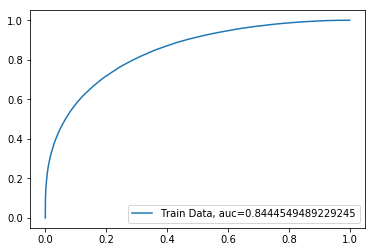

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt

y_pred_proba = clf.predict_proba(train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)
auc = metrics.roc_auc_score(y_train, y_pred_proba)
plt.plot(fpr,tpr,label="Train Data, auc="+str(auc))
plt.legend(loc=4)
plt.show()

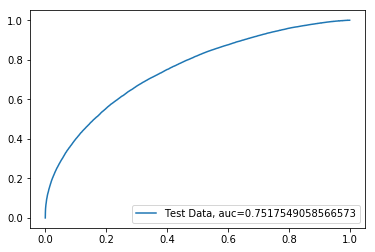

In [66]:
y_pred_proba = clf.predict_proba(test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Test Data, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Saving and loading model

In [32]:
# Using Pickle
import pickle

#Saving the model 
#clf_cat = pickle.dumps(clf)
#loading the model
clf2 = pickle.loads(clf_cat)


In [30]:
# Using joblib:
from sklearn.externals import joblib
#Save
joblib.dump(clf, 'clf_cat.joblib')
#load
#clf = joblib.load('clf_cat.joblib') 

['clf_cat.joblib']